# Density Estimation
We have seen that clustering algorithms aim to mine the underlying structure of data by breaking it into coherent groups. For example k-means clustering **allows to identify parts of the feature space with high density (i.e., a large number of observations)** by partitioning all observations into a **a discrete sets of $K$ data groups distributed around centroids**.

An alternative **smoother** approach would be to study the probability $P(X)$, where $X$ is the data. Indeed, if we could determine the probability value of an given point in space $\mathbf{x}$, we could naturally discover clusters in the data (**zones with high probability values**). Knowing the distribution of the data is also useful for a number of things:

* Similar to clustering, if $X$ is a series of observations of customers in a bank (e.g., age, sex, balance, salary, etc.), we may want to know $P(X)$ to understand which types of customers are more frequent (those that have large $P(X)$ values), or if there are different distinct groups of customers (e.g., if $P(X)$ has more than one mode);
* If $X$ is a set of images of faces, knowing $P(X)$ would allow us to understand if an image $x$ looks like an image of a face or not, which faces are more frequent, if there are more than one "groups" of faces, etc. If we could draw $x \sim P$, we could even generate new images of faces! (**by the way, this is what Generative Adversarial Networks do**);
* If $X$ is a series of observations of bank transactions, by modeling $P(X)$ we can infer if a given observation $\mathbf{x}$ is a typical transaction (high $P(\mathbf{x}$)) or whether it is an anomaly (low $P(X)$). If we can make assumptions on the nature of $P(X)$,, we can even make inference on the properties of a given data point $\mathbf{x}$. For instance, if $P$ is Gaussian, then datapoints which are further from the center are atypical and they can hence identify anomalous transactions.

A probability density is **a continuous function**, so estimating it is not as straightforward as estimating a **probability mass function**. There are two main classes of methods for density estimation:

* **Non-parametric methods**: these methods aim to estimate the density **directly from the data, without strong assumptions on the source distribution**. The main advantage of these methods is that they generally have few hyper-parameters to tune and can be used when no assumption can be made on the source of the data. A disadvantage is that, while we can numerically compute $f(\mathbf{x})$ with these methods (where $f$ is the density function), we do not know the analytical form or property of $f$;
* **Parametric methods**: these methods aim to **fit a known distribution to the data**. An example of this approach is **fitting a Gaussian to the data**. The main advantage of these methods is that they provide an analytical form for the density $f$, which can be useful in a number of contexts (for instance, the density may be part of a cost function we want to optimize). The downside is that these methods make strong assumptions on the nature of the data.

In the following, we will see the main representatives of these two classes of methods.

## Non-parametric Density Estimation Techniques

We hence usually resort to different approaches, the main of which are:

* **Fixed windows**: this consists in "discretizing" the range of the the variable $\mathbf{X}$ in "bins" of size $r$ and counting how many values fall within each window. **Histogram** belong to this class of methods for density estimation. Note that histograms can also be **extended to multiple dimensions** by considering d-dimensional tiles (e.g., square tiles in $\Re^2$);
* **Mobile windows**: as in histograms, the range of $\mathbf{X}$ the density estimation is performed by dividing the space into d-dimensional windows. However, in this case, the windows are not fixed, but mobile and overlapping, meaning that, given a point $\mathbf{x}$, we can estimate the density at $\mathbf{x}$ by centering a window around $\mathbf{x}$. **Kernel density estimation methods** as the one we saw at the beginning of the course fall in this category. This is also known as **Parzen window**.
* **Fixed samples**: rather than discretizing the range of $\mathbf{X}$, at any given point $\mathbf{x}$, we estimate the density $f(\mathbf{x})$ by looking at the $K$ closest point in space, where $K$ is fixed and comparing them to the size of a neighborhood containing all of them. We will see that this strategy is used to define the K-NN classification algorithm. 

The figure below illustrates three examples of density estimation using the three approaches above for an example dataset.

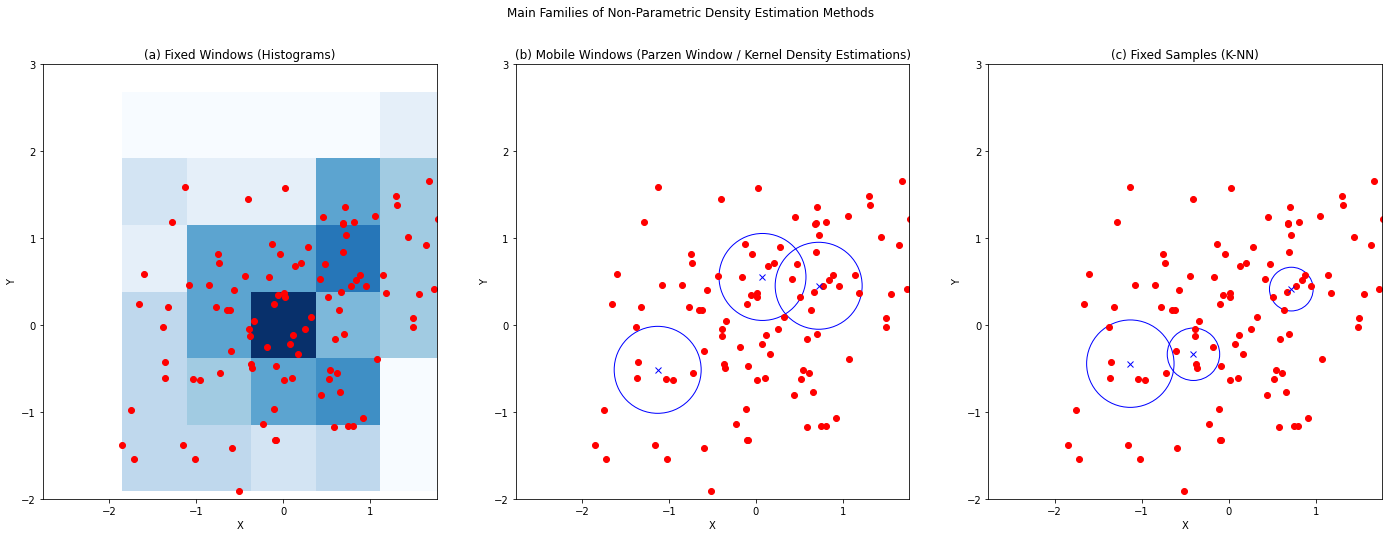

In [323]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
# data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=50)
# data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 1

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Calculate the number of bins in each dimension
num_x_bins = int((x_max - x_min) / bin_size)
num_y_bins = int((y_max - y_min) / bin_size)

# Create a square bin plot
_,axes=plt.subplots(figsize=(24,8),nrows=1,ncols=3)

for j in range(3):
    if j==0:
        a,b,c,d=axes[j].hist2d(data[:, 0], data[:, 1], bins=[num_x_bins, num_y_bins], cmap='Blues', density=True)
        #((np.diff(b).reshape(-1,1) * np.diff(c).reshape(1,-1))*a).sum() # check that it integrates to 1
        axes[j].plot(data[:,0],data[:,1],'o',color='red')
        axes[j].set_title('(a) Fixed Windows (Histograms)')
    elif j==1:
        axes[j].plot(data[:,0],data[:,1],'o',color='red')
        axes[j].set_title('(b) Mobile Windows (Parzen Window / Kernel Density Estimations)')
        nc = 3
        for i in range(nc):
            c = data[np.random.choice(len(data))]
            i1 = np.random.choice(len(data))
            i2 = np.random.choice(len(data))
            c = data[[i1,i2],[0,1]]
            axes[j].plot(c[0],c[1], 'x',color='blue')
            circle = plt.Circle(c, 0.5, edgecolor='blue', facecolor='none')

            axes[j].add_patch(circle)
    elif j==2:
        idx = np.random.permutation(len(data))
        d1 = data[idx[int(len(data)/2):]]
        d2 = data[idx[:int(len(data)/2)]]

        axes[j].plot(d1[:,0],d1[:,1],'o',color='red')
        axes[j].plot(d2[:,0],d2[:,1],'o',color='red')
        axes[j].set_title('(c) Fixed Samples (K-NN)')
        nc = 3
        nsamples = 6
        np.random.seed(10)
        for i in range(nc):
            c = data[np.random.choice(len(data))]
            i1 = np.random.choice(len(data))
            i2 = np.random.choice(len(data))
            c = data[[i1,i2],[0,1]]
            for r in np.linspace(0,5,200):
                num = ((data[:,0]-c[0])**2+(data[:,1]-c[1])**2 < r**2).sum()
                if num >= nsamples:
                    axes[j].plot(c[0],c[1], 'x',color='blue')
                    circle = plt.Circle(c, r, edgecolor='blue', facecolor='none')
                    axes[j].add_patch(circle)
                    break
    
    
    
    # Set labels and title
    axes[j].set_xlabel('X')
    axes[j].set_ylabel('Y')
    axes[j].axis('equal')
    


    # Show colorbar
    #cbar = plt.colorbar()
    cbar.set_label('Density')

    axes[j].set_xticks(np.arange(-3,8))
    axes[j].set_yticks(np.arange(-3,8))
    axes[j].set_xlim([-3,2])
    axes[j].set_ylim([-2,3])
    #plt.grid()

plt.suptitle('Main Families of Non-Parametric Density Estimation Methods')

# Display the plot
plt.show()


(a) The space is divided into non-overlapping square tiles (other shapes could be used as long as they'll cover the whole space), then the density for each square is computed by considering the number of examples falling into each square. (b) Given an arbitrary point $\mathbf{x}$ in the n-dimensional space, a neighborhood of a given radius $r$ is considered and the density for that point is estimated by considering the number of examples falling in the neighborhood. (c) Given an arbitrary point $\mathbf{x}$ in the n-dimensional space, we consider a neighborhood centered at $\mathbf{x}$ and radius $R_k(\mathbf{x})$ large enough to contain $K$ points. The density at $\mathbf{x}$ is computed by considering the size $R_k(\mathbf{x})$ (the smaller, the denser).

### Fixed Windows - D-Dimensional Histograms
Density estimation can be easily performed using D-Dimensional histograms. This method is the same as the one we saw in the case of 1-d histograms, but in general, **we will divide the D-Dimensional space into D-Dimensional regions (typically hypercubes)**. In the 2D case, these will simply be square tiles. The algorithm hence assigns a uniform density value to each region.

Let $\mathbf{X}$ be our set of observations and let $R_i$ be the $i^{th}$ region of a set of $\mathcal{R}=\{R_i\}_i$ regions in which we divided the space. We will assign the following density value to the $R_i$ region:

$$f(R_i) = \frac{|\{\mathbf{x} \in \mathbf{X} \cup R_i\}|}{|\mathbf{X}| \cdot V(R_i)}$$

where $V(R_i)$ is the volume of $R_i$. If $R_i$ is 1-dimensional (hence a segment), this will be its length, if $R_i$ is 2D, then it will be its area.

Recall that the probability of finding a value $\mathbf{x}$ in a given region $R$ is in general given by:

$$P(\mathbf{x} \in R_i)=\int_{R_i} f(\mathbf{x}) d\mathbf{x} = V(R_i) \cdot f(R_i)$$

The last part of the equality is true because we assigned uniform density values to each region.

We hence obtain that:

$$P(\mathbf{x} \in \mathbf{X}) = \sum_i P(R_i) = \sum_i V(R_i) \cdot f(R_i) = \sum_i V(R_i) \frac{|\{\mathbf{x} \in \mathbf{X} \cup R_i\}|}{|\mathbf{X}| \cdot V(R_i)} = $$

$$= \frac{V(R_i)}{V(R_i) |\mathbf{X}|}  \sum_i |\{\mathbf{x} \in \mathbf{X} \cup R_i\}| = \frac{V(R_i) |\mathbf{X}|}{V(R_i) |\mathbf{X}|} = 1$$

**Hence we can treat the density estimate as a valid probability density function.**

The plot below shows an example density estimation for a set of data. Note that **this approach has a few hyper-parameters which determine the size and position of the regions**. 

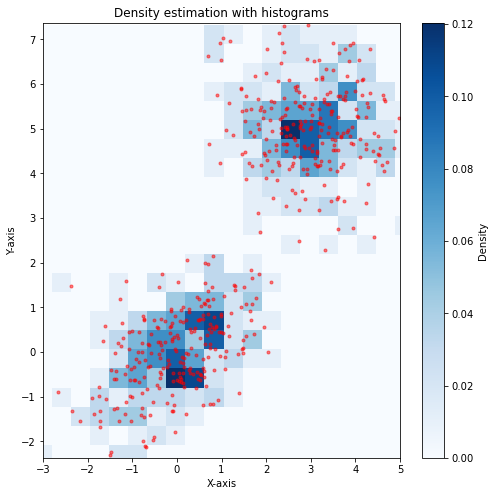

In [458]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=250)
data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=250)

data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 0.5

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Calculate the number of bins in each dimension
num_x_bins = int((x_max - x_min) / bin_size)
num_y_bins = int((y_max - y_min) / bin_size)

# Create a square bin plot
plt.figure(figsize=(8, 8))
plt.plot(data[:,0],data[:,1],'.r', alpha=0.5)
plt.hist2d(data[:, 0], data[:, 1], bins=[num_x_bins, num_y_bins], cmap='Blues', density=True)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.title('Density estimation with histograms')


# Show colorbar
cbar = plt.colorbar()
cbar.set_label('Density')

plt.xticks(np.arange(-3,8))
plt.yticks(np.arange(-3,8))
plt.xlim([-3,5])
plt.ylim([-2,7])
#plt.grid()

# Display the plot
plt.show()


Very closely related to the use of histograms for density estimation is the **hexplot**, a popular visualization techniques in which bins have an hexagonal shape to better approximate more symmetrical circular neighborhoods. The following plot shows an example of **hexplot**:

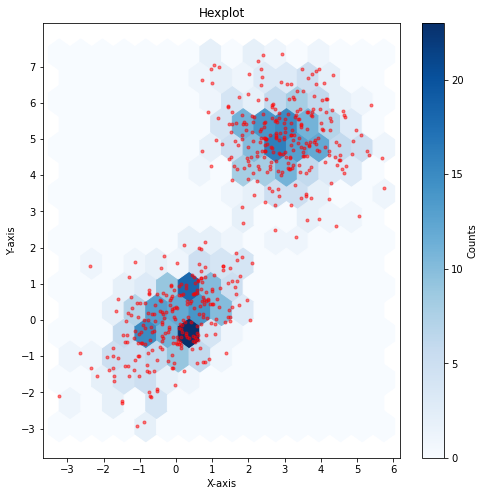

In [1034]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=250)
data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=250)

data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 0.5

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Calculate the number of bins in each dimension
num_x_bins = int((x_max - x_min) / bin_size)
num_y_bins = int((y_max - y_min) / bin_size)

# Create a square bin plot
plt.figure(figsize=(8, 8))
plt.plot(data[:,0],data[:,1],'.r', alpha=0.5)
plt.hexbin(data[:, 0], data[:, 1], gridsize=15, cmap='Blues')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.title('Hexplot')


# Show colorbar
cbar = plt.colorbar()
cbar.set_label('Counts')

plt.xticks(np.arange(-3,8))
plt.yticks(np.arange(-3,8))
plt.xlim([-3,5])
plt.ylim([-2,7])
#plt.grid()
plt.axis('equal')

# Display the plot
plt.show()


Note that hexplots **are not density plots**.

### Mobile Windows - Parzen Window / Kernel Density Estimation
While histograms allow to estimate density by placing a fixed grid on the data, the Parzen window approach, also known as kernel density estimation, places **a window, or region, around each arbitrary point in space $\mathbf{x}$**. This has the big advantage to allow us to estimate density values at arbitrary points **rather than setting fixed density over all points in a region**.

A naive approach to density estimation through Parzen Window would assign a point $\mathbf{x}$ a density by simply computing the fraction of points of $\mathbf{X}$ which fall between a neighborhood of size $r$ (where $r$ is a hyper-parameter) of $\mathbf{x}$, as follows:

$$f(\mathbf{x}) = \frac{|N(\mathbf{x},h)\}|}{\alpha|\mathbf{X}|}$$

where 

$$N(\mathbf{x},h) = \{\mathbf{y} \in \mathbf{X}\ s.t.\ ||\mathbf{y} - \mathbf{x}||_2 < h \}$$

is a neighborhood of $\mathbf{X}$ centered at $\mathbf{x}$ and of radius $h$, and $\alpha$ is a constant introduced to make sure that the density integrates to $1$: 

$$\int_{\mathbf{x} \in \Re^d} f(\mathbf{x}) d\mathbf{x}= 1$$

The plot below shows some density estimates using this method:

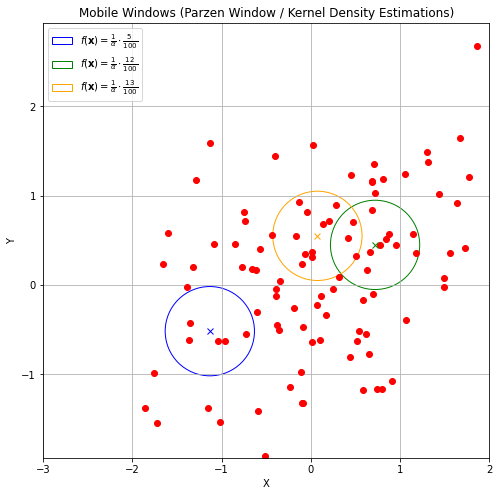

In [337]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
# data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=50)
# data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 1

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Create a square bin plot
plt.figure(figsize=(8,8))

plt.plot(data[:,0],data[:,1],'o',color='red')
plt.title('Mobile Windows (Parzen Window / Kernel Density Estimations)')
nc = 3
colors = ['blue', 'green', 'orange']
for i in range(nc):
    c = data[np.random.choice(len(data))]
    i1 = np.random.choice(len(data))
    i2 = np.random.choice(len(data))
    c = data[[i1,i2],[0,1]]
    plt.plot(c[0],c[1], 'x',color=colors[i])
    nn = ((data[:,0]-c[0])**2+(data[:,1]-c[1])**2 < 0.5**2).sum()
    circle = plt.Circle(c, 0.5, edgecolor=colors[i], facecolor='none', label="$f(\\mathbf{x})=\\frac{1}{\\alpha} \\cdot \\frac{"+f"{nn}"+"}{"+f"{len(data)}"+"}$")

    plt.gca().add_patch(circle)

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

# Show colorbar
#cbar = plt.colorbar()
cbar.set_label('Density')

plt.xticks(np.arange(-3,8))
plt.yticks(np.arange(-3,8))
plt.xlim([-3,2])
plt.ylim([-2,3])
plt.legend()
plt.grid()
# Display the plot
plt.show()


We can also write the expression above as:

$$f(\mathbf{x}) = \frac{1}{|\mathbf{X}|} \sum_{i=1}^{|\mathbf{X}|} K_h\left(\mathbf{x}_i - \mathbf{x}\right) $$

where $K_h$ is defined as:

$$K_h\left(\mathbf{x}_i - \mathbf{x}\right) = \begin{cases} \frac{1}{\pi h^2} & \text{if } ||\frac{\mathbf{x}_i - \mathbf{x}}{h}||_2 \leq 1 \\ 0 & \text{otherwise} \end{cases}$$

We will call $K_h$ **a kernel function** depending on the bandwidth parameter $h$. This is a function which assigns a weight to a point $\mathbf{x}_i$ depending on its distance from $\mathbf{x}$. In the example above, we chose $K_h$ as **a circular (or radial) kernel** which assigns a uniform score to all points falling in a circle of radius $h$ centered at $\mathbf{x}$. The score of $\frac{1}{\pi h^2}$ is chosen so that the density $f$ integrates to $1$.

A main problem with this density estimation approach is that **it can be very sensitive on the location at which we are computing the density**. Indeed, we can find cases in which we obtain very different density when we move the circle by a little bit.

We can note that **this is due by the kernel $K$ making "hard decisions" on which elements to assign a non-zero score and which ones to assign a zero score**. Indeed, if we plot the kernel as a function of the distance between $\mathbf{x}$ and $\mathbf{x}_i$, rescaled by $h$, we obtain the following picture:

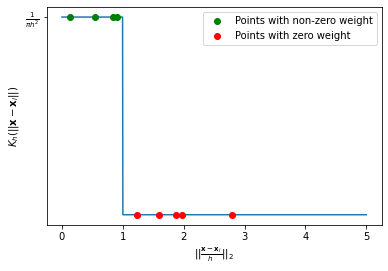

In [394]:
np.random.seed(44)
x = np.linspace(0,5,1000)
y = np.ones(len(x))*1/(np.pi)
dd = np.random.normal(0,1.5,20)
dd1 = dd[(dd>0) & (dd<=1)]
dd2 = dd[dd>1]
y[x>1] = 0

plt.plot(x,y)
plt.xlabel('$||\\frac{\\mathbf{x}-\\mathbf{x}_i}{h}||_2$')
plt.ylabel('$K_h(||\\mathbf{x}-\\mathbf{x}_i||)$')
plt.yticks([y[0]],["$\\frac{1}{\pi h^2}$"])
plt.plot(dd1,np.ones_like(dd1)/np.pi,'o', color='green', label='Points with non-zero weight')
plt.plot(dd2,np.zeros_like(dd2),'o', color='red', label='Points with zero weight')
plt.legend()
plt.show()



The plot also plots points putting their distance from $\mathbf{x}$ in the x axis and the assigned weight in the y axis. As can be noted, even very close points in the x axis (e.g., the last of the green ones and the first of the red ones) get assigned very different weights, which makes the overall process sensitive to small shifts.

To reduce this effect, it is common to use a smoother kernel which assigns a decreasing weight to points as their distance from $\mathbf{x}$ grows. Common choices for kernels are the Epanechnikov kernel and the Gaussian Kernel, which are defined as follows:

**Epanechnikov Kernel**

$$K_h(\mathbf{u}) = \frac{3}{4h^2} \left(1 - \frac{\|\mathbf{u}\|^2}{h^2}\right) \mathbb{I}(\|\mathbf{u}\| \leq h)$$

where $\mathbb{I}$ is the indicator function defined as:

$$\mathbb{I}(x) = \begin{cases} 1 & \text{if } x \text{ is true} \\ 0 & \text{otherwise}\end{cases}$$

**Gaussian Kernel**

$$K_h(\mathbf{x}) = \frac{1}{(2\pi h^2)^{d/2}} \exp\left(-\frac{\|\mathbf{x}\|^2}{2h^2}\right)$$

where $d$ is the dimensionality of the data ($2$ in our examples).

The plot below compares the scores assigned to points depending on their distance from $\mathbf{x}$ according to the three kernels seen so far:

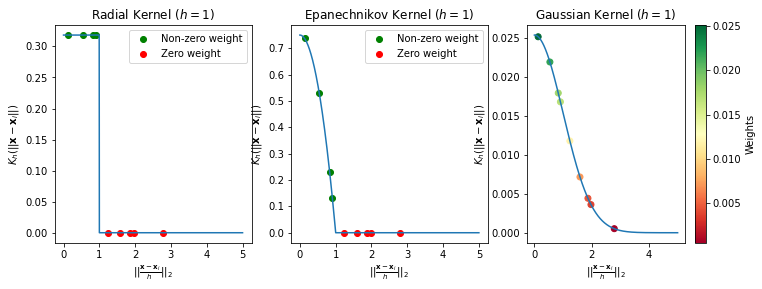

In [405]:
_, axs = plt.subplots(figsize=(12,4), nrows=1,ncols=3)
np.random.seed(44)
x = np.linspace(0,5,1000)
dd = np.random.normal(0,1.5,20)
dd1 = dd[(dd>0) & (dd<=1)]
dd2 = dd[dd>1]


for i in range(3):
    if i==0:
        y = np.ones(len(x))*1/(np.pi)
        y[x>1] = 0
        dd1y = np.ones_like(dd1)/np.pi
        dd2y = np.zeros_like(dd2)
        axs[i].set_title("Radial Kernel ($h=1$)")
        axs[i].plot(dd1,dd1y,'o', color='green', label='Non-zero weight')
        axs[i].plot(dd2,dd2y,'o', color='red', label='Zero weight')
        axs[i].legend()
    elif i==1:
        y = np.ones(len(x))*3/4*(1-x**2)
        y[x>1] = 0
        dd1y = 3/4*(1-dd1**2)
        dd2y = np.zeros_like(dd2)
        axs[i].set_title("Epanechnikov Kernel ($h=1$)")
        axs[i].plot(dd1,dd1y,'o', color='green', label='Non-zero weight')
        axs[i].plot(dd2,dd2y,'o', color='red', label='Zero weight')
        axs[i].legend()
    elif i==2:
        y = np.ones(len(x))*(1/(2*np.pi)**2)*np.exp(-x**2/2)
        dd1y = (1/(2*np.pi)**2)*np.exp(-dd1**2/2)
        dd2y = (1/(2*np.pi)**2)*np.exp(-dd2**2/2)
        axs[i].set_title("Gaussian Kernel ($h=1$)")
        ddd = np.concatenate([dd1,dd2])
        dddy = np.concatenate([dd1y,dd2y])
        sc = axs[i].scatter(ddd,dddy, c=dddy, cmap='RdYlGn',label='Points with non-zero weight')
        cbar = plt.colorbar(sc)
        cbar.set_label('Weights')
        
        
    axs[i].plot(x,y)
    
    axs[i].set_xlabel('$||\\frac{\\mathbf{x}-\\mathbf{x}_i}{h}||_2$')
    axs[i].set_ylabel('$K_h(||\\mathbf{x}-\\mathbf{x}_i||)$')
    #plt.yticks([y[0]],["$\\frac{1}{\pi h^2}$"])
    

plt.show()


This can be seen in 2D as follows:

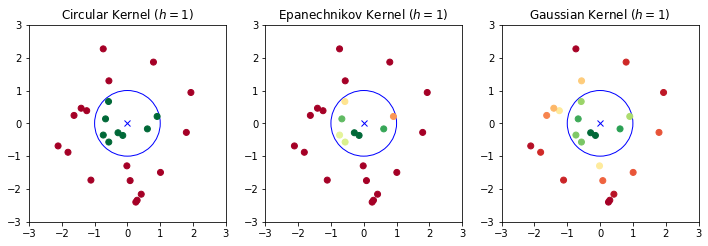

In [453]:
np.random.seed(42)
data = np.random.multivariate_normal((0,0),np.eye(2)*1.5,25)

_,axes=plt.subplots(nrows=1,ncols=3, figsize=(12,4))

h=1

for i in range(3):
    axes[i].add_patch(plt.Circle((0,0),h,facecolor='none', edgecolor='blue'))
    axes[i].plot(0,0,'xb')

    if i==0:
        y = np.ones_like(data[:,0])/np.pi
        y[(data[:,0]**2 + data[:,1]**2)>h**2]=0
        axes[i].set_title('Circular Kernel ($h=1$)')
    elif i==1:
        dist2 = (data[:,0]**2 + data[:,1]**2)
        y = (3/4*(1-dist2**2))
        y[(data[:,0]**2 + data[:,1]**2)>h**2]=0
        axes[i].set_title('Epanechnikov Kernel ($h=1$)')
    elif i==2:
        dist2 = (data[:,0]**2 + data[:,1]**2)
        y = np.ones(len(data[:,0]))*(1/(2*np.pi)**2)*np.exp(-dist2/2)
        axes[i].set_title('Gaussian Kernel ($h=1$)')

    
    axes[i].scatter(data[:,0], data[:,1], c=y, cmap='RdYlGn')
    
    axes[i].set_aspect('equal')
    axes[i].set_xlim([-3,3])
    axes[i].set_ylim([-3,3])

plt.show()

The following plot shows an example of Kernel Density estimation on a sample dataset:

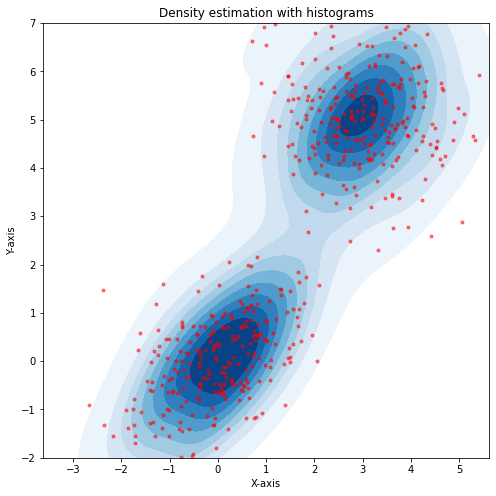

In [459]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=250)
data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=250)

data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 0.5

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Calculate the number of bins in each dimension
num_x_bins = int((x_max - x_min) / bin_size)
num_y_bins = int((y_max - y_min) / bin_size)

# Create a square bin plot
plt.figure(figsize=(8, 8))
plt.plot(data[:,0],data[:,1],'.r', alpha=0.5)
sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap='Blues', fill=True)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.title('Density estimation with histograms')

plt.xticks(np.arange(-3,8))
plt.yticks(np.arange(-3,8))
plt.xlim([-3,5])
plt.ylim([-2,7])
#plt.grid()

# Display the plot
plt.show()


Note that the bandwidth changes the sensitivity of the algorithm. Low bandwidth values (small circles), will make the estimation more sensitive to shifts. Large bandwidth values (large circles) will make the estimation more stable, but the final density may not capture all details of the distribution.

**Also in this case, the bandwidth regulates the trade-off between variance and bias.**

The plot below shows density estimations for different bandwidth values:

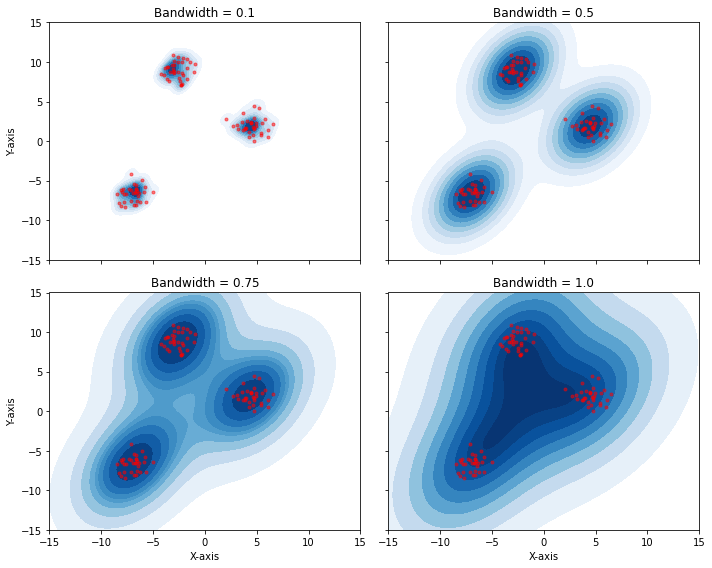

In [483]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
#data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=100)
data,_=make_blobs(100,n_features=2,centers=3)


# Bandwidth values to try
bandwidths = [0.1, 0.5, 0.75, 1.0]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

for i, bandwidth in enumerate(bandwidths):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Plot KDE with different bandwidths
    sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap='Blues', fill=True, bw_method=bandwidth, ax=ax)
    ax.plot(data[:,0], data[:,1], '.r', alpha=0.5)
    
    ax.set_title(f'Bandwidth = {bandwidth}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_xlim([-15,15])
    ax.set_ylim([-15,15])

plt.tight_layout()
plt.show()


### Fixed Samples - K-Nearest Neighbor
With either histograms or mobile windows, we have considered regions with a fixed size (e.g., the bandwidth $h$). In practice, this will lead to regions with very few or zero examples and regions with many examples. This can lead to some limitations as density estimates relying on fewer points will be more unstable (they will have a higher variance) and we will not be able to reliably estimate a density in areas where there are fewer points.

While one way to mitigate this is to use smoother kernels (e.g., the Gaussian one) assigning a non-zero weight to each example, another approach is to choose a neighborhood of $\mathbf{x}$ such that the number of elements in the neighborhood, besides $\mathbf{x}$ is exactly equal to $K$, where $K$ is an hyper-parameter. The advantage of this approach is to always rely on the same sample sample size when estimating the density.

Let $N(\mathbf(x),r)$ be a neighborhood centered at $\mathbf{x}$ with radius $r$. We will define $R_K$ as the **radius of the largest neighborhood centered at $\mathbf{x}$ containing at most $K$ examples, besides $\mathbf{x}$ (if it is included in $\mathbf{X}$)**:

$$R_K(\mathbf{x}) = \sup \{r : |N(\mathbf{x},r) \setminus \{\mathbf{x}\}| \leq K\}$$

We will also define $N_K(\mathbf{x})$ as the largest neighborhood of $\mathbf{x}$ containing at most $K$ elements:

$$N_K(\mathbf{x}) = N(\mathbf{x},R_K(\mathbf{x}))$$

K-NN density estimation will assign point $\mathbf{x}$ the following density estimate:

$$f(\mathbf{x}) = \frac{K}{|\mathbf{X}|} \cdot \frac{1}{V_d \cdot R_k(\mathbf{x})}$$

Where $V_d$ is the **volume of the unit d-dimensional ball** and $V_d \cdot R_k^d(\mathbf{x})$ is hence the volume of the d-dimensional ball of radius $R_K(\mathbf{x})$. Intuitively, if $R_k(\mathbf{x})$ is large, then we are in an area which is not very dense, so we will assign a small density value.

The figure below exemplifies the computation in 2D:

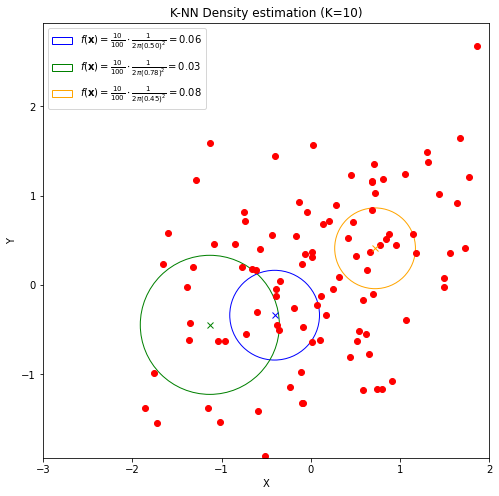

In [500]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
# data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=50)
# data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 1

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Calculate the number of bins in each dimension
num_x_bins = int((x_max - x_min) / bin_size)
num_y_bins = int((y_max - y_min) / bin_size)

# Create a square bin plot
_,ax=plt.subplots(figsize=(8,8),nrows=1,ncols=1)



idx = np.random.permutation(len(data))
d1 = data[idx[int(len(data)/2):]]
d2 = data[idx[:int(len(data)/2)]]

ax.plot(d1[:,0],d1[:,1],'o',color='red')
ax.plot(d2[:,0],d2[:,1],'o',color='red')
ax.set_title('K-NN Density estimation (K=10)')

nc = 3
nsamples = 10
np.random.seed(10)
colors = ['blue', 'green', 'orange']
for i in range(nc):
    c = data[np.random.choice(len(data))]
    i1 = np.random.choice(len(data))
    i2 = np.random.choice(len(data))
    c = data[[i1,i2],[0,1]]
    for r in np.linspace(0,5,200):
        num = ((data[:,0]-c[0])**2+(data[:,1]-c[1])**2 < r**2).sum()
        if num >= nsamples:
            ax.plot(c[0],c[1], 'x',color=colors[i])
            d = nsamples/len(data) * 1/(2*np.pi*r**2)
            circle = plt.Circle(c, r, edgecolor=colors[i], facecolor='none', label = "$f(\\mathbf{x})=\\frac{"+f"{nsamples}"+"}{"+f"{len(data)}"+"} \\cdot \\frac{1}{2 \\pi ("+f"{r:0.2f}"+")^2}="+f"{d:0.2f}"+"$")
            ax.add_patch(circle)
            break
    


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')



# Show colorbar
#cbar = plt.colorbar()
cbar.set_label('Density')

ax.set_xticks(np.arange(-3,8))
ax.set_yticks(np.arange(-3,8))
ax.set_xlim([-3,2])
ax.set_ylim([-2,3])
plt.legend()
#plt.grid()

# Display the plot
plt.show()

The plot below shows density estimates for different values of $K$:

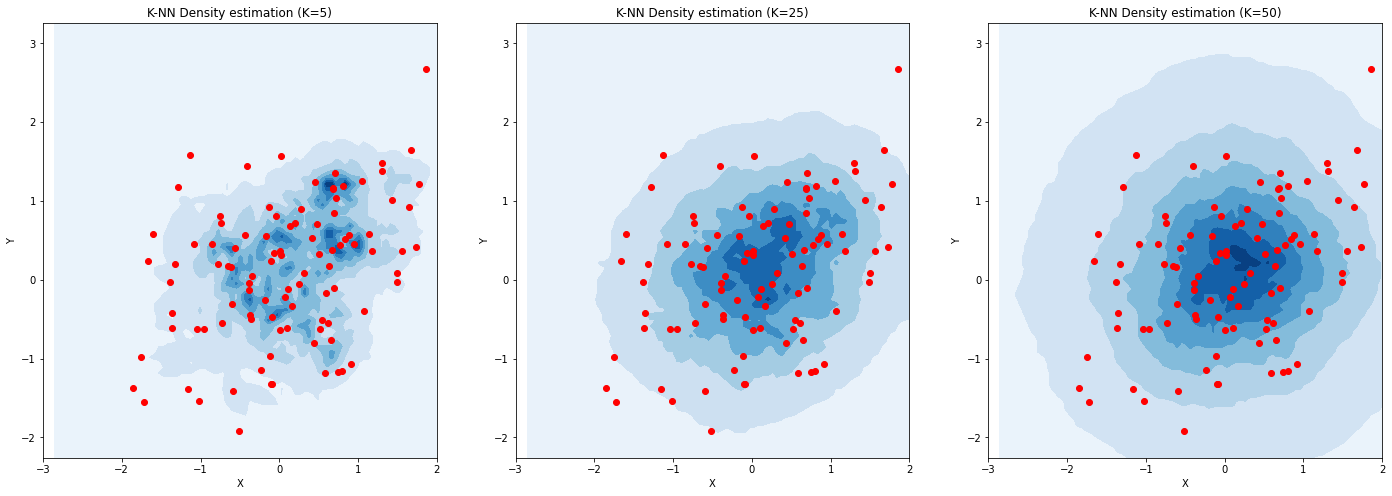

In [547]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
# data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=50)
# data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 1

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Create a square bin plot
_,axs=plt.subplots(figsize=(24,8),nrows=1,ncols=3)

idx = np.random.permutation(len(data))
d1 = data[idx[int(len(data)/2):]]
d2 = data[idx[:int(len(data)/2)]]

X, Y = np.meshgrid(np.linspace(x_min, x_max,100),np.linspace(y_min, y_max,100))
X=X.ravel()
Y=Y.ravel()

nsampless = [5,25,50]
for k,nsamples in enumerate(nsampless):
    ax = axs[k]
    ax.plot(d1[:,0],d1[:,1],'o',color='red')
    ax.plot(d2[:,0],d2[:,1],'o',color='red')
    ax.set_title('K-NN Density estimation (K='+f"{nsamples}"+')')

    densities = []
    for i in range(len(X)):
        c = np.array([X[i], Y[i]])
        for r in np.linspace(0,5,200):
            num = ((data[:,0]-c[0])**2+(data[:,1]-c[1])**2 < r**2).sum()
            if num > nsamples:
                d = nsamples/len(data) * 1/(2*np.pi*r**2)
                densities.append(d)
                break
        
    X.shape, Y.shape, np.array(densities).shape
    idx = np.argsort(densities)[::-1]
    dim = int(np.sqrt(len(X)))
    ax.contourf(X.reshape(dim,dim),Y.reshape(dim,dim),np.array(densities).reshape(dim,dim),cmap='Blues')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axis('equal')

    ax.set_xticks(np.arange(-3,8))
    ax.set_yticks(np.arange(-3,8))
    ax.set_xlim([-3,2])
    ax.set_ylim([-2,3])

# Display the plot
plt.show()

As we can see, $K$ acts as the bandwidth in the previous case, effectively determining the size of the neighborhoods in an adaptive way.

We will not see more details on this method, as kernel Density Estimation is in practice the most used **non-parametric density estimation method**. However, we will see how this approach will turn useful and practical to define classification algorithms.

## Parametric Density Estimation
Parametric methods aim to estimate density by **fitting a parametric model to the data**. This has some advantages over non-parametric density estimation:

* The chosen model has in general a known analytical formulation which we can reason on, or that we can even plug into a cost function and differentiate to pursue some optimization objective;
* The chosen model is compact. While non-parametric models need to keep in memory the whole dataset to make density estimations at given points, once fitted, parametric models can be used to predict density values using the analytical formulation of the model;
* If we choose an interpretable model, we can reason on the model to derive properties of the data. For instance, if we fit a Gaussian on the data, then we know that the mean is the point with highest density. We also know that when we go further from the mean, the density values decrease.

Nevertheless, these methods also have disadvantages:

* An optimization process is required to fit the model to the data, i.e., find appropriate values which make the model "explain well the data". This can be a time-consuming process.
* Parametric models make **strong assumption on the data**. For instance, if we fit a Gaussian to the data, we assume that the data is distributed in a Gaussian way. If this is not true, then the model will not be very accurate. This is a relevant point, as in many cases we cannot make strong assumptions on the data.

For the reasons above, it is common to use non-parametric density estimations for visualizations (e.g., the density plots we have seen and used in many cases), especially for exploration, when we do not know much about the data, and to use parametric model when we need to create efficient models able to make predictions (as we will see later in the course).

### Fitting a Gaussian to the Data
Recall the PDF of a multivariate Gaussian distribution with $n$ dimensions:

$$N\left( \mathbf{x;\mu,}\mathbf{\Sigma} \right) = \sqrt{\frac{1}{(2\pi)^{n}\det(\Sigma)}}e^{( - \frac{1}{2}\left( \mathbf{x} - \mathbf{\mu} \right)^{T}\Sigma^{- 1}\left( \mathbf{x} - \mathbf{\mu} \right))}$$


Let $\mathbf{X} = \{\mathbf{x}_1, \ldots, \mathbf{x}_N\}$ be a set of observations which we will assume to be **independent and drawn from a multivariate Gaussian distribution of unknown parameters**. We would like to find the parameters $\mathbf{\mu}$ and $\mathbf{\Sigma}$ that identify the **most likely Gaussian distribution that may have generated the data**. To do so, we can use the Maximum Likelihood (ML) principle, which consists in finding the parameters which maximize the probability values that the Gaussian distribution would compute for the given data. The likelihood is defined as

$$P(\mathbf{X}|\mathbf{\mu},\mathbf{\Sigma}) = \mathcal{N}(\mathbf{X}|\mathbf{\mu}, \mathbf{\Sigma})$$

Intuitively, we want to find $\mathbf{\mu}$ and $\mathbf{\Sigma}$ parameters such that the Gaussian distribution will assign high probability values to the observed points $\mathbf{x}$, i.e., such that **observing our dataset is highly probable under the given model**.

Let us consider a simple example in which we want to fit a Gaussian to a set of 1D data. The plot below shows the log likelihood for Gaussians with different means and standard deviations.

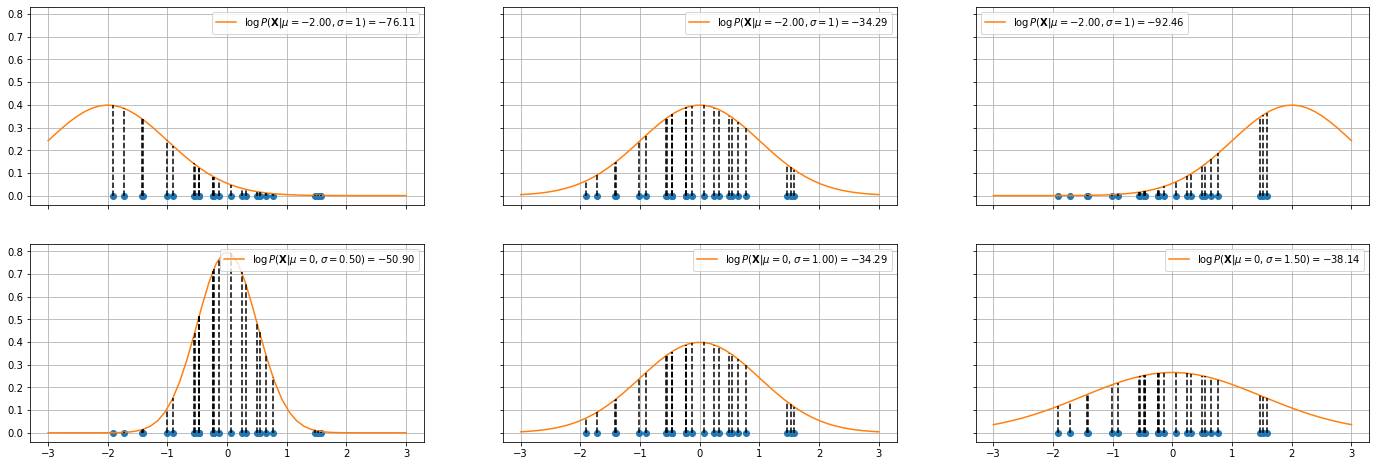

In [728]:
from scipy.stats import norm
np.random.seed(42)
data = np.random.normal(0, 1, 25)

_, axs = plt.subplots(figsize=(24,8), nrows=2, ncols=3, sharex=True, sharey=True)

i=0
mus = [-2, 0, 2]
for j in range(3):
    axs[i][j].plot(data, np.zeros_like(data),'o')

    likelihood = norm.pdf(data, mus[j], 1).prod()

    x = np.linspace(-3,3)
    axs[i][j].plot(x, norm.pdf(x, mus[j], 1), label="$\log P(\\mathbf{X}|\\mu={"+f"{mus[i]:0.2f}"+"},\\sigma=1)={"+f"{np.log(likelihood):0.2f}"+"}$")

    for d in data:
        axs[i][j].plot([d,d], [0,norm.pdf(d, mus[j], 1)], '--k')
        
    if j<2:
        axs[i][j].legend(loc='upper right')
    else:
        axs[i][j].legend(loc='upper left')
    axs[i][j].grid()


i=1
sigmas = [0.5, 1, 1.5]
for j in range(3):
    axs[i][j].plot(data, np.zeros_like(data),'o')

    likelihood = norm.pdf(data, 0, sigmas[j]).prod()

    x = np.linspace(-3,3)
    axs[i][j].plot(x, norm.pdf(x, 0, sigmas[j]), label="$\log P(\\mathbf{X}|\\mu=0,\\sigma="+f"{sigmas[j]:0.2f}"+")={"+f"{np.log(likelihood):0.2f}"+"}$")

    for d in data:
        axs[i][j].plot([d,d], [0,norm.pdf(d, 0, sigmas[j])], '--k')
        
    axs[i][j].legend(loc='upper right')
    axs[i][j].grid()
plt.show()

In the top plots, the standard deviation is fixed to $1$, while the mean of the Gaussian is changed. The log likelihood is shown in the legend. As can be seen, the mean in the center plot leads to larger log likelihood. **Intuitively, this happens when we choose a mean such that the majority of points fall in the central part of the Gaussian distribution**.

The plots in the bottom show a similar example in which the mean is fixed to $0$ and the standard deviation is varied. As can be noted, when the standard deviation is too low (left) or to high (right), we obtain smaller log likelihoods.

The plots below show the log likelihood (first two plots) or the likelihood (last plot) as a function of different values of means and standard deviations.

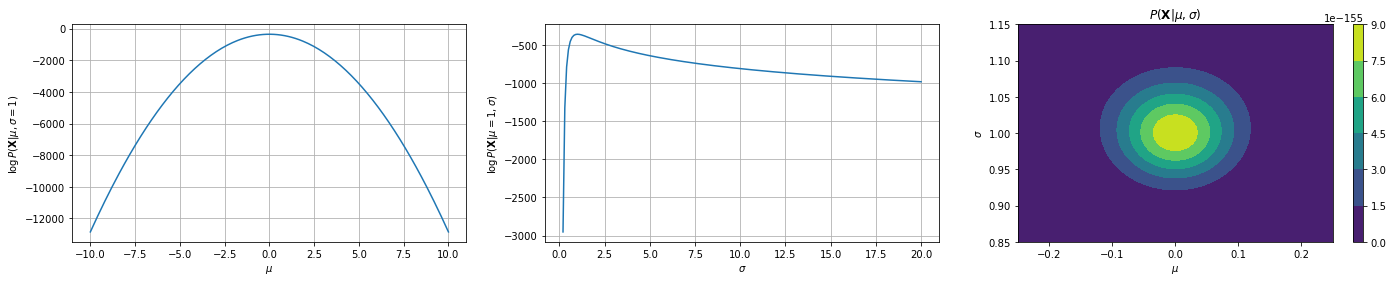

In [729]:
from scipy.stats import norm
np.random.seed(42)
data = np.random.normal(0, 1, 250)
data = data -data.mean()
data = data/data.std()

mus = np.linspace(-10,10,200)
sigmas = np.linspace(0.2,20,200)

_, axs = plt.subplots(figsize=(24,4), nrows=1, ncols=3)

lks_mu = []
for mu in mus:
    lks_mu.append(np.log(norm.pdf(data, mu, 1)).sum())

lks_sigma = []
for sigma in sigmas:
    lks_sigma.append(np.log(norm.pdf(data, 0, sigma)).sum())

axs[0].plot(mus, lks_mu)
axs[0].grid()
axs[0].set_xlabel("$\\mu$")
axs[0].set_ylabel("$\log P(\\mathbf{X}|\\mu, \\sigma=1)$")

axs[1].plot(sigmas, lks_sigma)
axs[1].grid()
axs[1].set_xlabel("$\\sigma$")
axs[1].set_ylabel("$\log P(\\mathbf{X}|\\mu=1, \\sigma)$")

X,Y = np.meshgrid(np.linspace(-0.25,0.25,100),np.linspace(0.85,1.15,100))

lks = []
for x,y in zip(X.ravel(), Y.ravel()):
    lks.append(norm.pdf(data, x, y).prod())

lks = np.array(lks).reshape(X.shape)

axs[2].set_title('$P(\\mathbf{X}|\\mu,\\sigma)$')
c = axs[2].contourf(X,Y,lks)
axs[2].set_xlabel("$\\mu$")
axs[2].set_ylabel("$\\sigma$")
plt.colorbar(c,ax=axs[2])

plt.show()

The first two plots show how the log likelihood changes when $\mu$ and $\sigma$ change, keeping the data fixed (same data as the previous plot). The last plot shows how the likelihood changes as a function of both $\mu$ and $\sigma$. As we can see, we have a maximum for $\mu=0$ and $\sigma=1$, which are the true parameters of the distribution which generated the data.

It can be shown that a close form solution exist for the estimation of the parameters of the N-Dimensional Gaussian. These are obtained by computing the derivatives of the log likelihood with respect to $\mathbf{\mu}$ and $\mathbf{\Sigma}$ and setting them to zero. We will not see the mathematical details, but the Maximum Likelihood estimates of the parameters for the n-dimensional Gaussian are:

$$\mathbf{\mu}_{ML} = \frac{1}{N} \sum_{i=1}^N \mathbf{x}_i$$

and

$$\mathbf{\Sigma}_{ML} = \frac{1}{N} \sum_{i=1}^N (\mathbf{x}_i - \mathbf{\mu}_{ML})(\mathbf{x}_i - \mathbf{\mu}_{ML})^T$$

We are very familiar with the first expression - it is simply the mean of the data. The second expression is the data covariance matrix. 

To see why the expression above denotes the covariance matrix, let us consider a set of 2D points $\mathbf{x}_i=(x_{i1},x_{i2})$ and the mean value $\mathbf{\mu}_{ML} = (\overline{x}_1,\overline{x}_2)$. We have:

$$\mathbf{\Sigma}_{ML} =  \frac{1}{N} \sum_{i=1}^N (\mathbf{x}_i - \overline{\mathbf{x}}) (\mathbf{x}_i - \overline{\mathbf{x}})^T = \frac{1}{N} \sum_{i=1}^N \left(\begin{matrix} x_{i1} - \overline{x}_1 \\ x_{i2} - \overline{x}_2 \end{matrix}\right) (x_{i1} - \overline{x}_1, x_{i2} - \overline{x}_2)=$$

$$=\frac{1}{N} \sum_{i=1}^N \left(\begin{matrix} (x_{i1}-\overline{x}_1)^2 & (x_{i1}-\overline{x}_1)(x_{i2}-\overline{x}_2) \\ (x_{i1}-\overline{x}_1)(x_{i2}-\overline{x}_2) & (x_{i2}-\overline{x}_2)^2\end{matrix}\right) = $$

$$= \left(\begin{matrix} \frac{1}{N} \sum_{i=1}^N(x_{i1}-\overline{x}_1)^2 & \frac{1}{N} \sum_{i=1}^N(x_{i1}-\overline{x}_1)(x_{i2}-\overline{x}_2) \\ \frac{1}{N} \sum_{i=1}^N(x_{i1}-\overline{x}_1)(x_{i2}-\overline{x}_2) & \frac{1}{N} \sum_{i=1}^N(x_{i2}-\overline{x}_2)^2\end{matrix}\right)$$

Which is the definition we have seen in the past for the covariance matrix.

### Gaussian Mixture Models (GMM)

We have seen that, when we can assume that the data follows a Gaussian distribution, it can be convenient to fit a D-dimensional Gaussian to the data and **summarize the data with distribution**. In practice, this consists in estimating a D-dimensional mean vector $\mathbf{\mu}$ and a $D \times D$ covariance matrix $\mathbf{\Sigma}$.

In practice, however **data is not always Gaussian**. As we have seen in the case of clustering, we can expect that our data is actually grouped under different clusters. Think about the Old Faithful dataset. Since the data **has two modes**, a Guassian model would lead to a poor fit.

The plot below compares a Guassian fit with a Kernel Density Estimation form the same data. The data has been standardized.

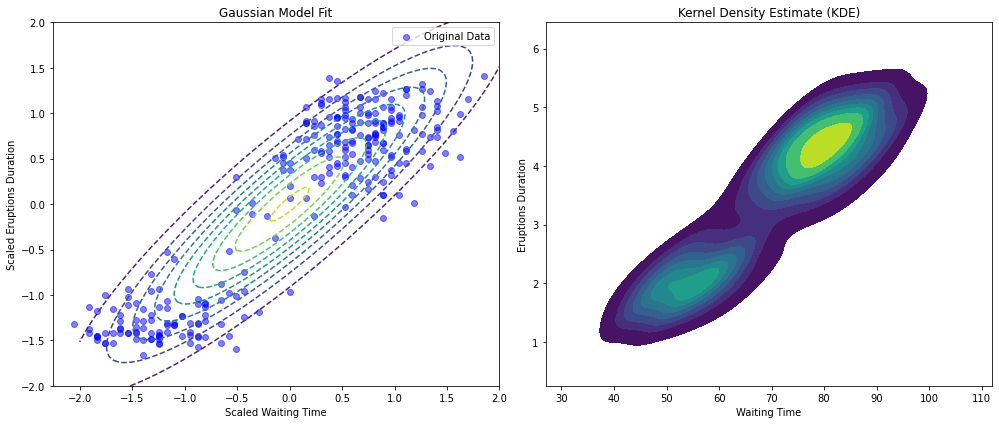

In [551]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load Old Faithful dataset from seaborn
faithful_data = sns.load_dataset("geyser")

# Extract relevant columns for this example
faithful_data_selected = faithful_data[['waiting', 'duration']]

# Standardize the data
scaler = StandardScaler()
faithful_data_scaled = scaler.fit_transform(faithful_data_selected)

# Fit a Gaussian Mixture Model to the data
gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm.fit(faithful_data_scaled)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
pos = np.dstack((x, y))
# Evaluate the Gaussian Mixture Model PDF on the meshgrid
pdf_values = np.exp(gmm.score_samples(pos.reshape(-1, 2)))
pdf_values = pdf_values.reshape(100, 100)

# Scatter plot of the original data and Gaussian Mixture Model fit on the left
axes[0].scatter(faithful_data_scaled[:, 0], faithful_data_scaled[:, 1], color='blue', alpha=0.5, label='Original Data')
axes[0].contour(x, y, pdf_values, levels=10, cmap='viridis', linestyles='dashed')
axes[0].set_xlabel('Scaled Waiting Time')
axes[0].set_ylabel('Scaled Eruptions Duration')
axes[0].set_title('Gaussian Model Fit')
axes[0].legend()



# KDE plot on the right
sns.kdeplot(data=faithful_data_selected, x='waiting', y='duration', fill=True, ax=axes[1], cmap='viridis')
axes[1].set_xlabel('Waiting Time')
axes[1].set_ylabel('Eruptions Duration')
axes[1].set_title('Kernel Density Estimate (KDE)')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


As can be seen, the unimodal Guassian distribution is not a good fit. Indeed, the center of the Gaussian lies in an area with low density, as shown by the density estimation on the right.

An alternative approach would consist in fitting two separate Gaussian distributions to the two clusters of data, as shown in the following:

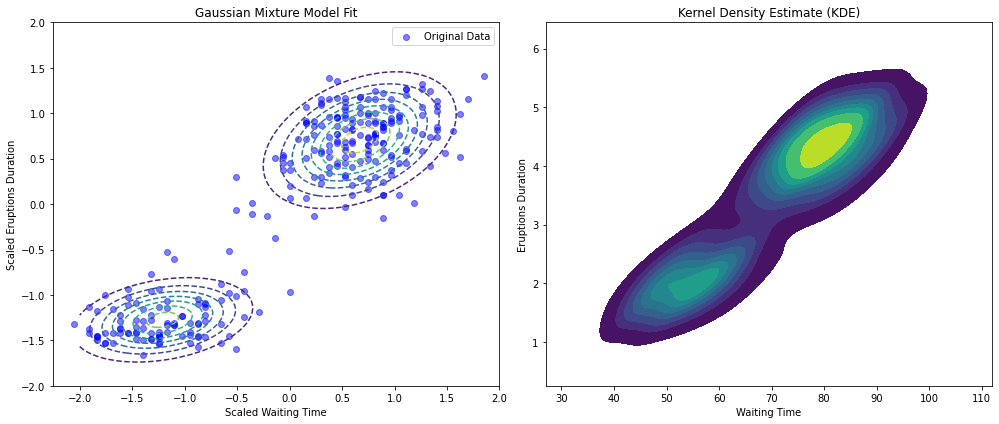

In [550]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load Old Faithful dataset from seaborn
faithful_data = sns.load_dataset("geyser")

# Extract relevant columns for this example
faithful_data_selected = faithful_data[['waiting', 'duration']]

# Standardize the data
scaler = StandardScaler()
faithful_data_scaled = scaler.fit_transform(faithful_data_selected)

# Fit a Gaussian Mixture Model to the data
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(faithful_data_scaled)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
pos = np.dstack((x, y))
# Evaluate the Gaussian Mixture Model PDF on the meshgrid
pdf_values = np.exp(gmm.score_samples(pos.reshape(-1, 2)))
pdf_values = pdf_values.reshape(100, 100)

# Scatter plot of the original data and Gaussian Mixture Model fit on the left
axes[0].scatter(faithful_data_scaled[:, 0], faithful_data_scaled[:, 1], color='blue', alpha=0.5, label='Original Data')
axes[0].contour(x, y, pdf_values, levels=10, cmap='viridis', linestyles='dashed')
axes[0].set_xlabel('Scaled Waiting Time')
axes[0].set_ylabel('Scaled Eruptions Duration')
axes[0].set_title('Gaussian Mixture Model Fit')
axes[0].legend()



# KDE plot on the right
sns.kdeplot(data=faithful_data_selected, x='waiting', y='duration', fill=True, ax=axes[1], cmap='viridis')
axes[1].set_xlabel('Waiting Time')
axes[1].set_ylabel('Eruptions Duration')
axes[1].set_title('Kernel Density Estimate (KDE)')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


We could then define a unified probability distribution averaging the two distributions:

$$p(\mathbf{x}) = \frac{1}{2} \mathcal{N}(\mathbf{x}|\mathbf{\mu}_1, \mathbf{\Sigma}_1) + \frac{1}{2} \mathcal{N}(\mathbf{x}|\mathbf{\mu}_2, \mathbf{\Sigma}_2)$$

where $\mathcal{N}(\mathbf{x}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)$ is the normal distribution of mean $\mathbf{\mu}_k$ and covariance matrix $\mathbf{\Sigma}_k$ computed at point $\mathbf{x}$. 

More in general, we may want to weigh more one distribution over the others. We can hence define the following general model:

$$p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_i, \mathbf{\Sigma}_i)$$

This model is known as a **Gaussian Mixture Model (GMM)**. Each Gaussian $\mathcal{N}(\mathbf{x}|\mathbf{\mu}_i, \mathbf{\Sigma}_i)$ is called **a component of the GMM**. The parameters $\pi_k$ are called **mixing coefficients** and are defined such that:

$$0 \leq \pi_k \leq 1, \ k=1,\ldots,K$$

and

$$\sum_{k=1}^K \pi_k = 1$$

The following plot illustrates an example of a 1D Gaussian Mixture Model with three components:

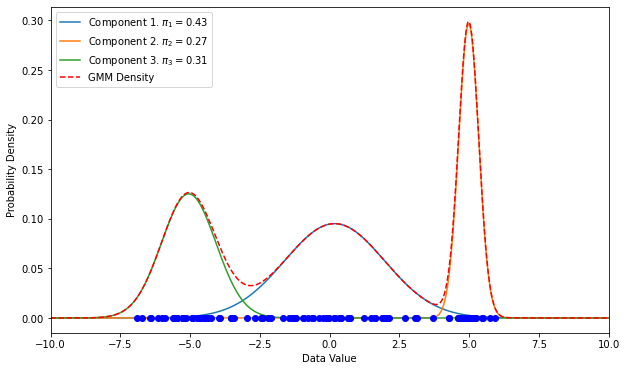

In [589]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

# Generate synthetic data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=-5, scale=1, size=30),
    np.random.normal(loc=0, scale=2, size=50),
    np.random.normal(loc=5, scale=0.5, size=30)
])

# Reshape the data for model fitting
data = data.reshape(-1, 1)

# Fit a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data)

# Generate data for plotting
x = np.linspace(-10, 15, 1000).reshape(-1, 1)

# Plot the GMM as the sum of full Gaussian distributions for each component
plt.figure(figsize=(10, 6))

for i in range(3):
    component_pdf = gmm.weights_[i] * norm.pdf(x, loc=gmm.means_[i, 0], scale=np.sqrt(gmm.covariances_[i, 0, 0]))
    plt.plot(x, component_pdf, label=f'Component {i+1}. $\\pi_{i+1} = {gmm.weights_[i]:0.2f}$')

pdf = np.exp(gmm.score_samples(x))
plt.plot(x, pdf, '--',color='red', label='GMM Density')
plt.plot(data, np.zeros_like(data),'ob')
#plt.scatter(gmm.means_, gmm.weights_ / (np.sqrt(2 * np.pi) * gmm.covariances_), color='black', zorder=10, marker='x', s=100, label='Gaussian Components')

plt.xlabel('Data Value')
plt.ylabel('Probability Density')
plt.xlim([-10,10])
plt.legend()
plt.show()


A similar plot in 2D is shown below:

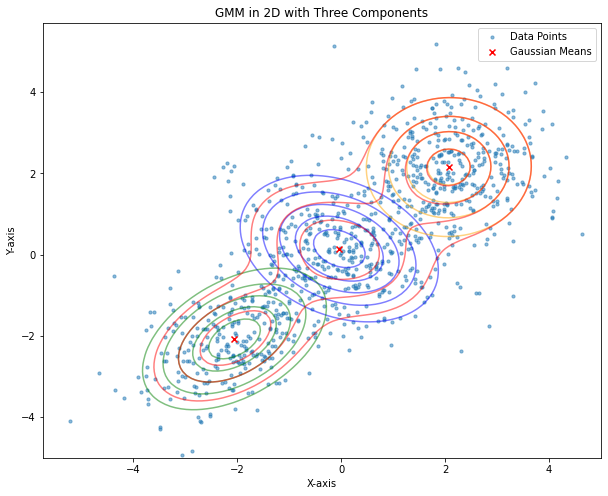

In [598]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

# Generate synthetic data
np.random.seed(42)

# Define means and covariance matrices for each component
means = np.array([[-2, -2], [0, 0], [2, 2]])
covariances = np.array([[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]], [[1, 0], [0, 1]]])
weights = np.array([0.3, 0.3, 0.4])

# Generate data points
data = np.concatenate([np.random.multivariate_normal(mean, cov, int(weight * 1000))
                       for mean, cov, weight in zip(means, covariances, weights)])

# Fit a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data)

# Create a meshgrid for plotting
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
grid = np.c_[x.ravel(), y.ravel()]

# Compute PDF values for each component
pdf_values = [weight * multivariate_normal(mean, cov).pdf(grid)
              for mean, cov, weight in zip(gmm.means_, gmm.covariances_, gmm.weights_)]

pdf1, pdf2, pdf3 = pdf_values

# Reshape PDF values for contour plotting
pdf_values = np.sum(pdf_values, axis=0).reshape(x.shape)

# Plot the GMM components and contours
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data Points', s=10)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', marker='x', label='Gaussian Means')

plt.contour(x, y, np.array(pdf1).reshape(x.shape), levels=5, colors='blue', alpha=0.5)
plt.contour(x, y, np.array(pdf2).reshape(x.shape), levels=5, colors='orange', alpha=0.5)
plt.contour(x, y, np.array(pdf3).reshape(x.shape), levels=5, colors='green', alpha=0.5)

# Plot contours for the GMM
plt.contour(x, y, pdf_values, levels=5, colors='red', alpha=0.5)

plt.title('GMM in 2D with Three Components')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


#### Optimization by Maximum Likelihood
The Gaussian Mixture Model depends on the following parameters:

$$\mathbf{\pi} = \{\pi_1, \pi_2, \ldots, \pi_K\} \text{,   } \mathbf{\mu}=\{\mathbf{\mu}_1, \mathbf{\mu}_2, \ldots, \mathbf{\mu}_K\}, \mathbf{\Sigma} = \{\mathbf{\Sigma}_1,\mathbf{\Sigma}_2, \ldots, \mathbf{\Sigma}_K\}$$


Similarly to what seen for Gaussian models, we can optimize Gaussian Mixture Models with Maximum Likelihood. Assuming that the observations $\mathbf{x}_i \in \mathbf{X}$ are **independent and identically distributed**, we can define the likelihood of the data, given the model as follows:

$$P(\mathbf{X}|\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}) = \prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x_i}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)$$

Rather than maximizing the likelihood above, we can maximize the logarithm of the likelihood:

$$\log P(\mathbf{X}|\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}) = \sum_{i=1}^N \log\left[\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x_i}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)\right]$$

This optimization process is not straightforward and **there is no closed form solution**. Instead, it can be optimized through iterative numerical methods or with a powerful algorithm called **Expectation-Maximization**. Before delving into that, it is useful to see the GMM from a probabilistic perspective.

### Probabilistic Formulation of GMM with Latent Variables
We will now give a probabilistic treatment of the GMM. This will lead us to the interpretation of the model as one with latent variables and to the illustration of the Expectation-Maximization (E-M) algorithm for maximum likelihood optimization.

We will start by introducing a $K-dimensional$ random variable $\mathbf{Z}$. The values $\mathbf{z}=(z_1,\ldots,z_K)$ assumed by $\mathbf{Z}$ will be such that:

$$z_k \in \{0,1\}, \text{   and   } \sum_{k=1}^K z_k = 1 $$

In practice, $\mathbf{Z}$ has a **one-hot representation**, with only one of its components $z_k$ being equal to $1$ at a given time and the others being equal to $0$. 

We can also see $Z$ as a **categorical variable** assuming values going from $1$ to $K$, with value $k$ being represented by the vector $\mathbf{z} = (z_1=0, z_2=0, \ldots, z_k=1, \ldots, z_K=0)$. If **we denote such vector** as 

$$H_k^K = (z_1=0, z_2=0, \ldots, z_k=1, \ldots, z_K=0)$$

then we can also write $\mathbf{Z} = H_k^K$ to denote that variable $\mathbf{Z}$ assumes value $k$.

We will assume that $\mathbf{Z}=H_k^K$ encodes the event **$\mathbf{X}$ belongs to component $k$ of the GMM**. This means that any example $\mathbf{x}_i$ will be associated to a related value $\mathbf{z}_i$ of the introduced variable $\mathbf{Z}$, which will effectively assign $\mathbf{x}_i$ to one of the $K$ components of the GMM. 

> **Latent Variables**
> 
> We will call the newly introduced variable $\mathbf{Z}$ a **latent variable**. Indeed, while $\mathbf{Z}$ has a clear semantic, this stems from **an assumption made at the model-level**. Hence, we cannot directly observe the values of $\mathbf{Z}$ as we can instead do for $\mathbf{X}$, which will be called an **observed variables** (most of the variables we have seen so far in the course are observed variables). Nevertheless, being able to determine the values of $\mathbf{Z}$ has a **very practical implication**, as these values can be used, for instance, to cluster the data, or to find the best parameters of each of the components.

We'll assume that $\mathbf{Z}$ **follows a categorical distribution** with probability vector $\mathbf{\pi}=(\pi_1, \pi_2, \ldots, \pi_K)$, hence:

$$P(z_k=1)=\pi_k$$

with:

$$0 \leq \pi_k \leq 1,  \sum_{k=}^K \pi_k = 1$$

Note that since $\mathbf{z}$ is encoded as a one-hot vector, we can write more compactly:

$$P(\mathbf{z}) = \prod_{k=1}^K \pi_k^{z_k}$$

Once we fix a value $z_k=1$ for the latent variable $\mathbf{Z}$, we will express the probability of $\mathbf{x}$, conditioned on $z_k=1$ with a Gaussian of appropriate parameters $\mathbf{\mu}_k$ and $\mathbf{\Sigma}_k$:

$$P(\mathbf{x}|z_k=1) = \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)$$

Following the notation above, we can also write:

$$P(\mathbf{x}|\mathbf{z}) = \prod_{k=1}^K \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)^{z_k}$$

Note that, since we want to estimate the density of $\mathbf{X}$, we wish to find values for $P(\mathbf{x})$. Applying the **product rule** and the **sum rule**, we obtain the following marginal probability:

$$P(\mathbf{x}) = \sum_{\mathbf{z}} P(\mathbf{x},\mathbf{z}) = \sum_{\mathbf{z}} P(\mathbf{z}) P(\mathbf{x}|\mathbf{z}) = $$
$$= \sum_{k=1}^K P(z_k=1) P(\mathbf{x}|z_k=1) = \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)$$

This leads us to **the same exact definition of the GMM seen previously**, but within a probabilistic framework where we also have access to the joint distribution $p(\mathbf{x,z})$, which will be useful when we'll introduce the Expectation Maximization algorithm to maximize the likelihood and hence optimize the model.

#### Inferring Values for the Latent Variable $\mathbf{Z}$
Another interesting interpretation is that, to each **observed $\mathbf{x}_i$ value**, we will implicitly **assign a corresponding $\mathbf{z}_i$ value** indicating to which component of the Gaussian Mixture Model the observation belongs. This is useful, as it will allow us to use the GMM model as a **clustering algorithm** in which we can determine to which cluster each data point belongs.

In practice, this can be done by finding the $z_k$ value for which the following quantity is maximized:

$$\gamma(z_k) = P(z_k=1|\mathbf{x})$$

Since there are only $K$ possible $z_k$, maximizing the expression above is trivial: **we just compute it for all values of $k$ and select the $k$ value which maximizes the conditional probability above**:

$$\hat k = \arg_{k}\max \{P(z_k=1|\mathbf{x}), k=1,\ldots,K\}$$

Using Bayes' theorem, we obtain:

$$\gamma(z_k) = P(z_k=1|\mathbf{x}) = \frac{P(z_k=1) P(\mathbf{x}|z_k=1)}{P(\mathbf{x})} = \frac{P(z_k=1) P(\mathbf{x}|z_k=1)}{\sum_{j=1}^K P(z_j=1)P(\mathbf{x}|z_j=1)} = \frac{\pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k \mathbf{\Sigma}_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(\mathbf{x}|\mathbf{\mu}_j \mathbf{\Sigma}_j)}$$

where we noted that:

$$P(\mathbf{x}) = \sum_{j=1}^K P(z_j=1) P(\mathbf{x}|z_j=1)$$

In Bayesian terms, we can see $\pi_k$ as **the prior probability that $\mathbf{x}$ belongs to component $k$**, while $\gamma(z_k)$ is the **posterior probability, after we have observed $\mathbf{x}$**. The term $\gamma(z_k)$ is also called **the responsibility that component $k$ takes for "explaining" the observation $\mathbf{x}$**.

Given this interpretation, we can see a GMM as a **probabilistic version of K-Means clustering, in which each example is associated to a probability of belonging to a given cluster (or component)**. The plot below illustrates this by showing a GMM with 2 components fitted to a 2D dataset. Data points are colored according the predicted probability of belonging to first component. 

As can be noted, points in between the two clusters are assigned "uncertain" probability values.

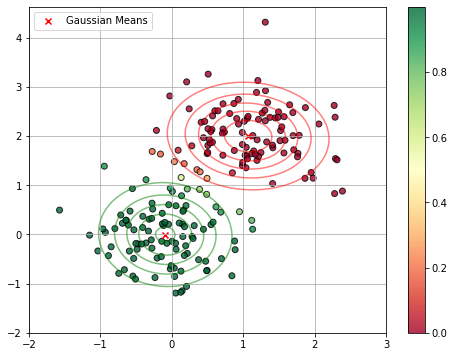

In [793]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_openml


np.random.seed(42)
plt.figure(figsize=(8,6))
data, labels = make_blobs(n_samples=200,n_features=2, centers=[(0,0),(1,2)], cluster_std=0.6)

# Fit a Gaussian Mixture Model (GMM) with 2 components to the data
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)
responsibilities = gmm.predict_proba(data)

# Plot the data points with different shades of color based on responsibilities
scatter=plt.scatter(data[:, 0], data[:, 1], c=responsibilities[:,0], cmap='RdYlGn', marker='o', edgecolors='k', alpha=0.8)

x, y = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-2, 4, 100))
grid = np.c_[x.ravel(), y.ravel()]

pdf_values = [weight * multivariate_normal(mean, cov).pdf(grid)
              for mean, cov, weight in zip(gmm.means_, gmm.covariances_, gmm.weights_)]

pdf1, pdf2 = pdf_values

# Reshape PDF values for contour plotting
pdf_values = np.sum(pdf_values, axis=0).reshape(x.shape)

# Plot the GMM components and contours
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', marker='x', label='Gaussian Means')

plt.contour(x, y, np.array(pdf1).reshape(x.shape), levels=5, colors='green', alpha=0.5)
plt.contour(x, y, np.array(pdf2).reshape(x.shape), levels=5, colors='red', alpha=0.5)

# Plot the means of the Gaussian components
#plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=200, label='Gaussian Means')
plt.colorbar(mappable=scatter)

# Add labels and legend
plt.legend()
plt.grid()

# Show the plot
plt.show()


#### Sampling from a GMM
Note that this formulation of the GMM allows us to **generate data new points $\hat{\mathbf{x}}$ which would follow the distribution of the original data**. This is done by following a techniques such as the following one, which is also known as **ancestral sampling**:
* We first sample a variable $\hat{\mathbf{z}}$ from the marginal distribution $P(\mathbf{z})$. Note that this distribution is a categorical one;
* We then sample $\mathbf{x}$ from the conditional probability $P(\mathbf{x}|\hat{\mathbf{z}})$. Note that, once $\hat{\mathbf{z}}$ is fixed, the conditional distribution will simply be a Gaussian distribution with a given mean $\mathbf{\mu}_k$ and covariance matrix $\mathbf{\Sigma}_k$.

Standard methods exist for sampling from categorical and Gaussian distributions, but we will not see them in details.

The plot below shows a set of data together with another set of data generated from a GMM fit to the original data. As can be seen, the data follows a similar distribution.

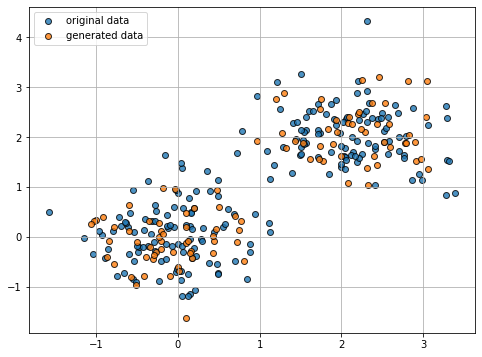

In [800]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


np.random.seed(42)
plt.figure(figsize=(8,6))
data, labels = make_blobs(n_samples=200,n_features=2, centers=[(0,0),(2,2)], cluster_std=0.6)

# Fit a Gaussian Mixture Model (GMM) with 2 components to the data
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)
responsibilities = gmm.predict_proba(data)

# Plot the data points with different shades of color based on responsibilities
plt.scatter(data[:, 0], data[:, 1], marker='o', edgecolors='k', alpha=0.8, label='original data')

data2,_ = gmm.sample(100)
plt.scatter(data2[:, 0], data2[:, 1], marker='o', edgecolors='k', alpha=0.8, label='generated data')

# Add labels and legend
plt.legend()
plt.grid()

# Show the plot
plt.show()


### The Expectation-Maximization Algorithm for GMM

As discussed earlier, we wish to maximize the logarithm of the likelihood, which we have seen assumes the following form:

$$\log P(\mathbf{X}|\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}) = \sum_{i=1}^N \log\left[\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x_i}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)\right]$$

We will not see all mathematical steps, but if we **compute the derivative of the expression above with respect to the means $\mathbf{\mu}_k$ of the Gaussian components and set it to zero**, we obtain that optimal means can be obtained by the following expressions:

$$\mathbf{\mu}_k = \frac{1}{N_k} \sum_{i=1}^N \gamma(z_{ik})\mathbf{x}_i \ \ \ \ \ \text{(A)}$$

where $z_{ik}$ is the k-th component of the $\mathbf{z}_i$ value associated to the observation $\mathbf{x}_i$ and

$$N_k = \sum_{i=1}^N \gamma(z_{ik})$$

Recall that $\gamma(z_{ik}) = P(\mathbf{z}_i = H_k^K|\mathbf{x}_i)$, hence we can see $N_k$ as a **"soft count"** of the number of elements belonging to each component (or alternatively, in each cluster). The count is "soft" because the $\gamma(z_{ik})$ are probability values. If $\gamma(z_{ik})$ were extreme probabilities (either $0$ or $1$), $N_k$ would be the actual of elements in each cluster.

We can see the expression above for the estimation of the optimal mean for the k-th component $\mathbf{\mu}_k$ as the average of all data points $\mathbf{x}_i$, weighted by the probabilities $\gamma(z_{ik})$ that each of these data points belong to the k-th components, rescaled by the soft count of the number of elements assigned to the k-th components. Note that if probabilities $\gamma(z_{ik})$ were again binary (either $0$ or $1$), the estimation above **would become identical to the update step of K-Means**, so in some sense, we can see it as a "soft", probabilistic version of it.

If we set the derivative of $\log P(\mathbf{x}|\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma})$ with respect to $\mathbf{\Sigma}_k$ to zero, we obtain the following expression for the optimal covariance matrix:

$$\mathbf{\Sigma}_k = \frac{1}{N_k} \sum_{i=1}^N \gamma(z_{ik}) (\mathbf{x}_i - \mathbf{\mu}_k) (\mathbf{x}_i - \mathbf{\mu}_k)^T \ \ \ \ \ \text{(B)}$$

Recall that the ML estimation of the covariance matrix for fitting a D-dimensional Gaussian to the data is:

$$\mathbf{\Sigma}_{ML} = \frac{1}{N} \sum_{i=1}^N (\mathbf{x}_i - \mathbf{\mu}_{ML})(\mathbf{x}_i - \mathbf{\mu}_{ML})^T$$

The two expressions are similar, but in the case of GMMs, we are weighing each data point $\mathbf{x}_i$ by the responsibility $\gamma(z_{ik})$ and the denominator is given by the "soft count" of points assigned to component $k$.

We finally set to zero the derivative of the log likelihood with respect to the mixing coefficients $\pi_k$ and obtain the following expression for the estimation of the optimal values:

$$\pi_k = \frac{N_k}{N} \ \ \ \ \ \text{(C)}$$

Hence, the mixing coefficient for component $k$ is given by the soft count $N_k$ of points assigned to component $k$ divided by the total number of points $N$.

We shall note that results (A), (B) and (C) **do not constitute a closed form solution** to find the parameters of the mixture model. Indeed, they depend on the responsibilities $\gamma(z_{ik})$ in a complex way. Moreover, we have a **chicken and egg problem**. Indeed:

> To estimate (A), (B) and (C) we need to be able to compute the responsibilities $\gamma(z_{ik})$, but to compute these values, we first need to have estimates for $\mathbf{\mu}_k$ (A), $\mathbf{\Sigma}_k$ (B), and $\pi_k$ (C).

While we do not have a closed form solution for the estimation of the parameters, we can apply a **simple iterative scheme, which is an instance of the Expectation Maximization (EM) algorithm applied to the specific case of the Gaussian mixture model**.

The iterative scheme works as follows:
* We choose some initial values for $\mathbf{\mu}_k$, $\mathbf{\Sigma}_k$ and $\pi_k$. A common initialization scheme consists in **running a K-Means clustering** and then fitting K Gaussian distributions, one for each cluster. We compute the initial value of the log likelihood.
* We alternate through two steps:
  * Expectation (or E step): we use the current estimates of the parameters to find the responsibilities - these are the **posterior probabilities of assigning a given data point $\mathbf{x}_i$ to a given component $k$, after seeing the data point $\mathbf{x}_i$ and given the model parameters**. It's called "expectation" step as we will compute the expected assignment of points to components given the data points and the fixed parameters.
  * Maximization (or M step): we now assume that the assignment given by the responsibilities is correct and use the $\gamma(z_{ik})$ values to **re-estimate the parameters of the model** through the equations (A), (B), and (C). **We update the value of the log likelihood**.
* We stop iterating when a given maximum number of iterations has been reached or when the difference between new log likelihood value and the old one is very small (below a given threshold).

It can be shown (but we will not formally see it) that each E step followed by an M step is guaranteed to increase the log likelihood (and hence the likelihood). Hence the algorithm will converge sooner or later.


#### Pseudocode
The box below summarizes the algorithm in pseudocode:

> 1. Initialize the means $\mathbf{\mu}_k$, covariances $\mathbf{\Sigma}_k$ and mixing coefficients $\pi_k$. A possible initialization is to run a K-Means with $k$ clusters and fit $K$ Gaussian distributions, each on each cluster. Initial mixing coefficients can be chosen as the fractions of data points assigned to each cluster. Compute an initial value for the log likelihood using the formula:
> 
>    $$\log P(\mathbf{X}|\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}) = \sum_{i=1}^N \log\left[\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x_i}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)\right]$$
> 
> 2. Repeat until termination criterion is reached {
>    * **E Step**: Compute responsibilities using the current parameter values using the formula:
>
>      $$\gamma(z_k) = \frac{\pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k \mathbf{\Sigma}_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(\mathbf{x}|\mathbf{\mu}_j \mathbf{\Sigma}_j)}$$
>    * **M Step**: Estimate the parameter values using the current estimate for the responsibilities using the following formulas:
>
>      $$\mathbf{\mu}_k = \frac{1}{N_k} \sum_{i=1}^N \gamma(z_{ik})\mathbf{x}_i \ \ \ \ \ \text{(A)}$$
> 
>      $$\mathbf{\Sigma}_k = \frac{1}{N_k} \sum_{i=1}^N \gamma(z_{ik}) (\mathbf{x}_i - \mathbf{\mu}_k) (\mathbf{x}_i - \mathbf{\mu}_k)^T \ \ \ \ \ \text{(B)}$$
> 
>      $$\pi_k = \frac{N_k}{N} \ \ \ \ \ \text{(C)}$$
>      
>      with
>     
>      $$N_k = \sum_{i=1}^N \gamma(z_{ik})$$
>
>     * Re-evaluate the log likelihood using the formula:
>
>       $$\log P(\mathbf{X}|\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}) = \sum_{i=1}^N \log\left[\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x_i}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)\right]$$       
> }

#### Example Execution

Similarly to K-Means clustering, we will now see an example execution of the E-M algorithm. We will consider a GMM with 2 components. Since the EM algorithm is slower than K-Means, we will not show all iterations.

We will consider the following synthetic dataset:

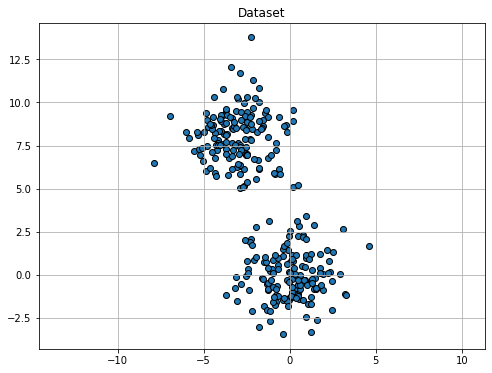

In [982]:
# Generate synthetic data
data, _ = make_blobs(n_samples=300,random_state=42,cluster_std=1.5, centers=[[-3,8],[0,0]])

# Plot the initial state
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], edgecolors='k')
plt.grid()
plt.title('Dataset')
plt.axis('equal')
plt.show()


Rather than initializing with K-Means, we consider an ad-hoc initialization (imagine this to be random) to illustrate the process.

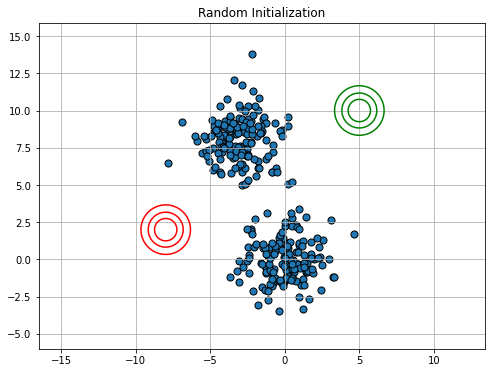

In [983]:
def plot_gaussian(mean, covariance, c):
    x, y = np.mgrid[-11:8:0.1, -6:16:0.1]
    pos = np.dstack((x, y))
    gaussian = multivariate_normal(mean, covariance)
    plt.contour(x, y, gaussian.pdf(pos), levels=3,  colors=c)

means = init_means = np.array([[5,10],[-8,2]])
covariances = init_covariances = [np.eye(2), np.eye(2)]

# Plot the initial state
plt.figure(figsize=(8, 6))

plt.scatter(data[:, 0], data[:, 1], edgecolors='k', s=50)
#plt.scatter(clusters[:, 0], clusters[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')
for i,m,c,color in zip(range(2),means, covariances, ['green','red']):
    plot_gaussian(m, c, color)
plt.grid()
plt.title('Random Initialization')
plt.axis('equal')
plt.show()

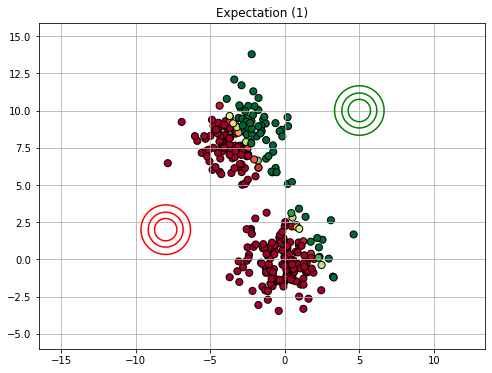

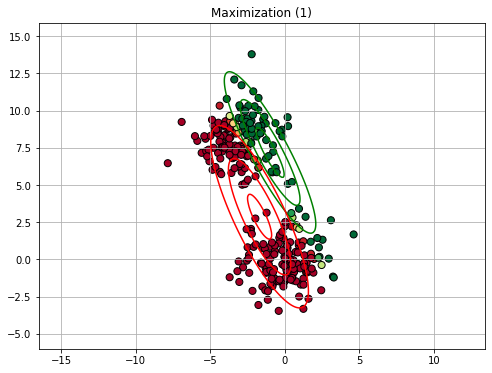

In [984]:
# Plot the initial state
plt.figure(figsize=(8, 6))

prob1 = multivariate_normal(means[0], covariances[0]).pdf(data)
prob2 = multivariate_normal(means[1], covariances[1]).pdf(data)
resp = 0.5*prob1 / (0.5*prob1+0.5*prob2)

plt.scatter(data[:, 0], data[:, 1], c=resp, cmap='RdYlGn', edgecolors='k', s=50)
for i,m,c,color in zip(range(2),means, covariances, ['green','red']):
    plot_gaussian(m, c, color)
plt.grid()
plt.axis('equal')
plt.title('Expectation (1)')
plt.show()

gmm=GaussianMixture(n_components=2, max_iter=1, weights_init=[0.5,0.5], means_init=init_means, precisions_init=init_covariances)

gmm.fit(data)
means = gmm.means_
covariances = gmm.covariances_

#resp = gmm.predict_proba(data)[:,0]

# Plot the initial state
plt.figure(figsize=(8, 6))

plt.scatter(data[:, 0], data[:, 1], c=resp, cmap='RdYlGn', edgecolors='k', s=50)
for i,m,c,color in zip(range(2),means, covariances, ['green','red']):
    plot_gaussian(m, c, color)
plt.grid()
plt.axis('equal')
plt.title('Maximization (1)')
plt.show()

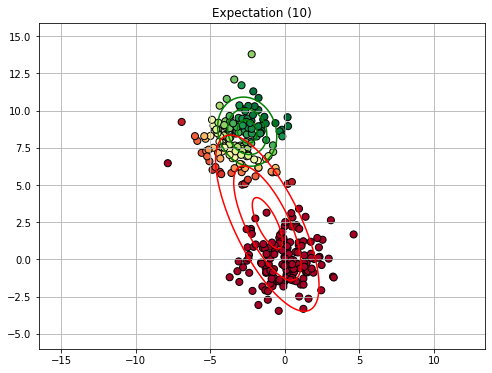

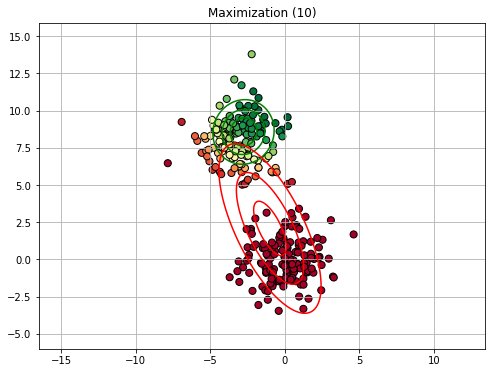

In [985]:
def show_step(iter):

    # Plot the initial state
    plt.figure(figsize=(8, 6))


    gmm=GaussianMixture(n_components=2, max_iter=iter-1, weights_init=[0.5,0.5], means_init=init_means, precisions_init=init_covariances)
    gmm.fit(data)
    resp = gmm.predict_proba(data)[:,0]
    means = gmm.means_
    covariances = gmm.covariances_

    plt.scatter(data[:, 0], data[:, 1], c=resp, cmap='RdYlGn', edgecolors='k', s=50)
    for i,m,c,color in zip(range(2),means, covariances, ['green','red']):
        plot_gaussian(m, c, color)
    plt.grid()
    plt.axis('equal')
    plt.title(f'Expectation ({iter})')
    plt.show()

    gmm=GaussianMixture(n_components=2, max_iter=iter, weights_init=[0.5,0.5], means_init=init_means, precisions_init=init_covariances)

    gmm.fit(data)
    means = gmm.means_
    covariances = gmm.covariances_

    # Plot the initial state
    plt.figure(figsize=(8, 6))

    plt.scatter(data[:, 0], data[:, 1], c=resp, cmap='RdYlGn', edgecolors='k', s=50)
    for i,m,c,color in zip(range(2),means, covariances, ['green','red']):
        plot_gaussian(m, c, color)
    plt.grid()
    plt.axis('equal')
    plt.title(f'Maximization ({iter})')
    plt.show()

show_step(10)

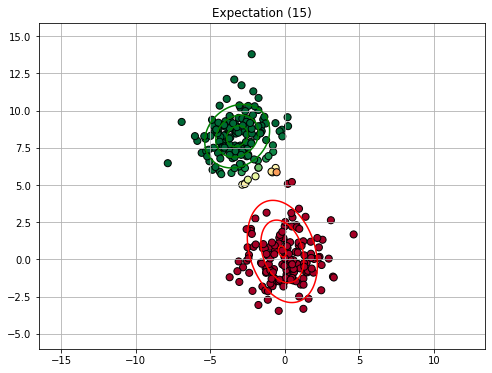

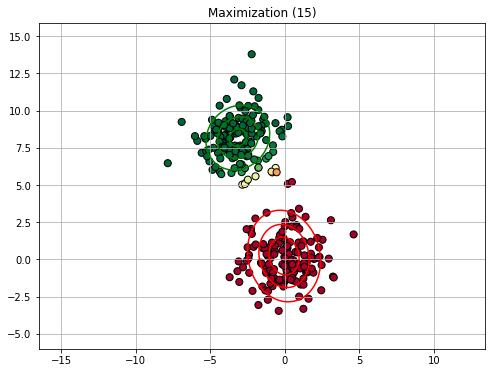

In [986]:
show_step(15)

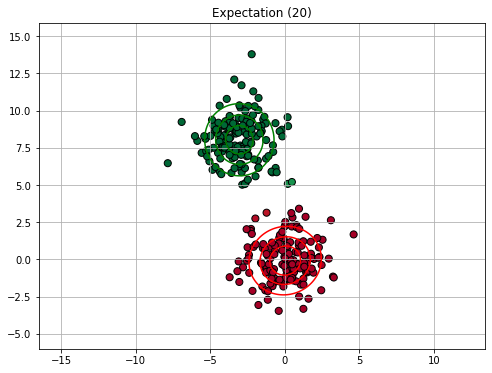

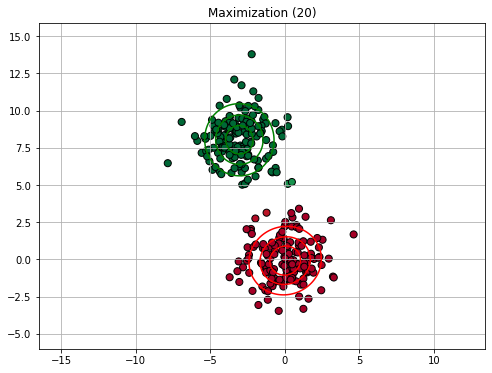

In [987]:
show_step(20)

#### Expectation Maximization in General
We have seen the EM algorithm instantiated to the optimization of GMMs. However, the EM algorithm is **a general framework for finding maximum likelihood estimates of parameters in models with latent variables**. As such, it can be applied also in other contexts in which the Maximum Likelihood estimates lead to a "**chicken and egg**" problem, in which we need to be able to estimate the probability of latent variables to fit a model to the observed data, but, at the same time, we need to fit the model to the data to model latent variables.

### GMM vs K-Means
The EM algorithm is very similar to the optimization algorithm of K-Means. It can be shown that K-Means can be seen as a particular case of Gaussian Mixture Models in which:
* Points are assigned to clusters in a "*hard*" way, as compared to the **soft assignment** made by the responsibilities $\gamma(z_{ik})$ in Gaussian Mixture Models;
* Clusters are assumed to have diagonal covariance matrices $\epsilon \mathbf{I}$ where $\mathbf{I}$ is the $D \times D$ identity matrix and $\epsilon$ is a variance parameter which is **shared by all components**. This means that the clusters are assumed to be all **symmetrical and with the same shape**.

Despite these differences highlight the limitations of K-Means, it should be considered that K-Means is a significantly faster algorithm than GMM. Hence, if studying the probability density $P(\mathbf{X})$ is not needed and we can assume symmetrical clusters with similar shapes, K-Means is in practice a more popular choice, due to its faster convergence.

The plot below illustrates such differences:

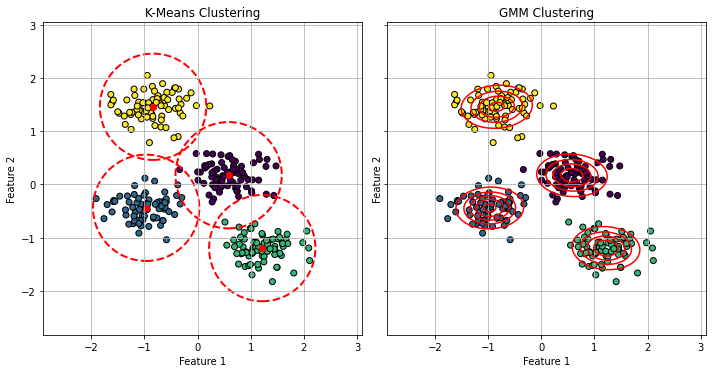

In [1022]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate skewed synthetic data
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X[:, 1] = X[:, 1] * 3 + 10  # Add skewness to the data

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
kmeans_centers = kmeans.cluster_centers_

# Apply Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X)
gmm_labels = gmm.predict(X)

# Function to plot circles around k-means cluster centers
def plot_kmeans_circles(kmeans, ax):
    for i in range(len(kmeans.cluster_centers_)):
        circle = plt.Circle(kmeans.cluster_centers_[i], 1, color='red', fill=False, linestyle='dashed', linewidth=2)
        ax.add_artist(circle)

# Function to plot density estimation for each Gaussian component in GMM
def plot_gmm_density(gmm, ax):
    h = 0.02  # Step size of the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    positions = np.c_[xx.ravel(), yy.ravel()]
    density = np.sum([coef * multivariate_normal(mean, cov).pdf(positions) for coef, mean, cov in zip(gmm.weights_, gmm.means_, gmm.covariances_)], axis=0)
    density = density.reshape(xx.shape)

    ax.contour(xx, yy, density, colors='red', levels=5, linewidth=2)

# Plotting
_, axs = plt.subplots(figsize=(10, 5), nrows=1, ncols=2, sharex=True, sharey=True)

# Plot k-means results with circles around cluster centers
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
axs[0].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', marker='o', label='Cluster Centers')
plot_kmeans_circles(kmeans, axs[0])
axs[0].set_title('K-Means Clustering')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].set_aspect('equal')
axs[0].grid()
#axs[0].legend()

# Plot GMM results with density estimation
axs[1].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', edgecolors='k')
plot_gmm_density(gmm, axs[1])
axs[1].set_title('GMM Clustering')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

axs[1].set_aspect('equal')
axs[1].grid()
# Show the plot
plt.tight_layout()
plt.show()


## References
 - https://en.wikipedia.org/wiki/Metric_space
 - https://en.wikipedia.org/wiki/Measure_(mathematics)
 - Section 19 of notes of the course "Fondamenti di Analisi dei Dati" 2022/2023 - Prof. Giovanni Gallo
 - https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation
 - https://en.wikipedia.org/wiki/Kernel_density_estimation
 - http://faculty.washington.edu/yenchic/18W_425/Lec7_knn_basis.pdf
 - Section 9.2 of \[1\]
 
 \[1\] Bishop, Christopher M., and Nasser M. Nasrabadi. Pattern recognition and machine learning. Vol. 4. No. 4. New York: springer, 2006.